## EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# CustomerID는 index와 같의 의미이므로 삭제한다
df.drop("CustomerID",axis=1,inplace=True)

In [4]:
df['Gender'] = df['Gender'].map({'Male':0,"Female":1})

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [6]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### 결측치 있는지 확인

In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

-> 없는듯 하다

### 너무 이상한 이상치 있는지 확인

[]

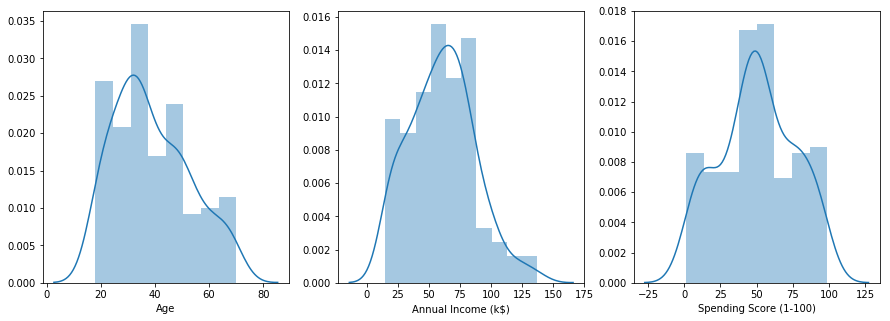

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(1,3,figsize=(15,5)) # (1,2) subplot 생성 


sns.distplot(df['Age'],ax=ax[0])
sns.distplot(df['Annual Income (k$)'],ax=ax[1])
sns.distplot(df['Spending Score (1-100)'],ax=ax[2])
plt.plot()

-> 없는 듯 하다

## Clustering

### 2. K-Means

In [10]:
n_clusters =4

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [12]:
from sklearn.cluster import KMeans
#K-Means 군집 분석 
model = KMeans(n_clusters=n_clusters,algorithm='auto')
model.fit(df)
# 군집 번호 매겨서 분류하기
predict = pd.DataFrame(model.predict(df))
predict.columns=['predict']

In [13]:
# 한 row가 한 center다.
model.cluster_centers_

array([[ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.62105263, 44.89473684, 48.70526316, 42.63157895],
       [ 0.47368421, 40.39473684, 87.        , 18.63157895],
       [ 0.5       , 24.82142857, 28.71428571, 74.25      ]])

In [14]:
# 그 중에서 한 차원을 빼버리면 3차원에서 z축을 빼면 flat 해지는 원리처럼 flatten 된다.
centers = model.cluster_centers_[:,1:]
centers = pd.DataFrame(centers)

In [15]:
centers

,0,1,2
0,32.692308,86.538462,82.128205
1,44.894737,48.705263,42.631579
2,40.394737,87.000000,18.631579
3,24.821429,28.714286,74.250000


In [16]:
centers.loc[0]

0    32.692308
1    86.538462
2    82.128205
Name: 0, dtype: float64

In [17]:
centers[0]

0    32.692308
1    44.894737
2    40.394737
3    24.821429
Name: 0, dtype: float64

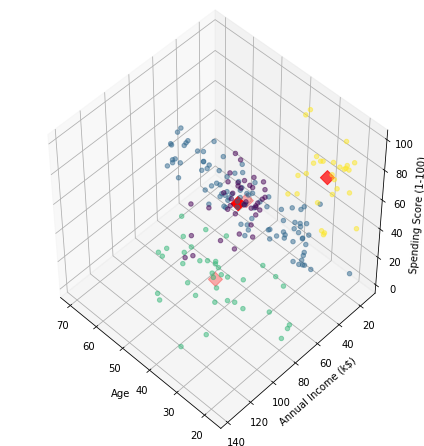

In [18]:
# 각 군집의 중심점 
# centers = pd.DataFrame(model.cluster_centers_,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
# center_x = centers['Age']
# center_y = centers['Annual Income (k$)']
# center_z = centers['Spending Score (1-100)']

# 시각화a
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)'],c=predict['predict'],alpha=0.5)
# column 을 보내줘야 row별로 잘 시각화 한다.
ax.scatter(centers[0],centers[1],centers[2],s=100,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [19]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [20]:
predict.loc[0].item()

3

In [21]:
df_with_predict = pd.concat([df,predict],axis=1)

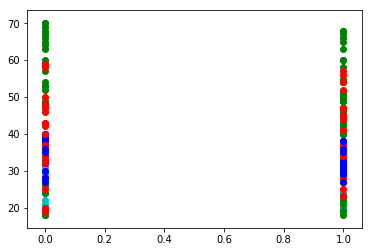

In [22]:
for i in range(len(df)):
    for j in range(n_clusters):
        if predict.loc[i].item() == j:
            plt.scatter(df.loc[i,'Gender'],df.loc[i,'Age'],c=colors[j])

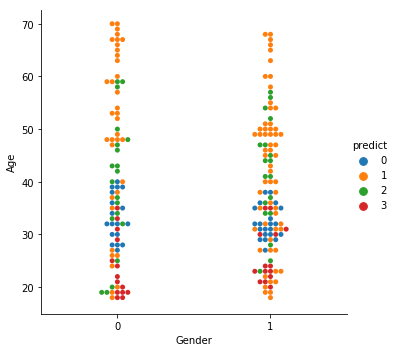

In [23]:
sns.catplot(x="Gender", y="Age",hue = "predict", kind="swarm", data=df_with_predict)

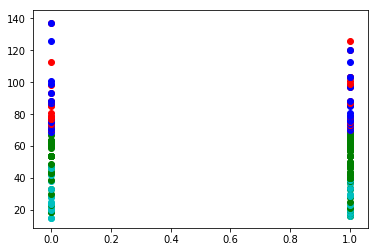

In [24]:
for i in range(len(df)):
    for j in range(n_clusters):
        if predict.loc[i].item() == j:
            plt.scatter(df.loc[i,'Gender'],df.loc[i,'Annual Income (k$)'],c=colors[j])

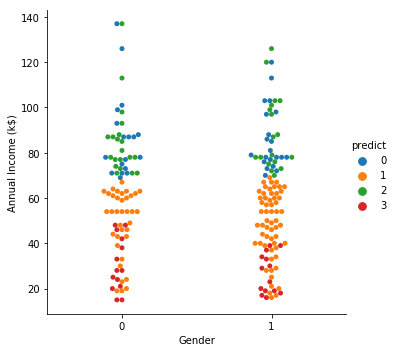

In [25]:
sns.catplot(x="Gender", y="Annual Income (k$)",hue = "predict", kind="swarm", data=df_with_predict)

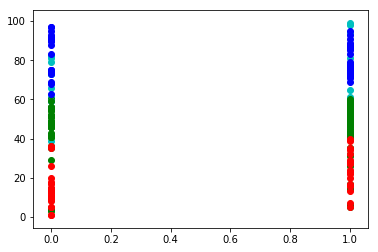

In [26]:
for i in range(len(df)):
    for j in range(n_clusters):
        if predict.loc[i].item() == j:
            plt.scatter(df.loc[i,'Gender'],df.loc[i,'Spending Score (1-100)'],c=colors[j])

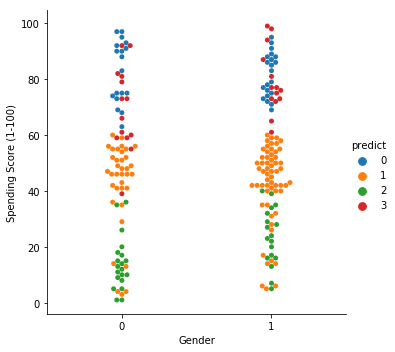

In [27]:
sns.catplot(x="Gender", y="Spending Score (1-100)",hue = "predict", kind="swarm", data=df_with_predict)

### -> Gender의 경우에 Age는 불규칙한 군집이 생기고 나머지는 그래도 분류가되는 편이다

### 최적의 k 설정

Text(0.5, 1.0, 'Elbow curve')

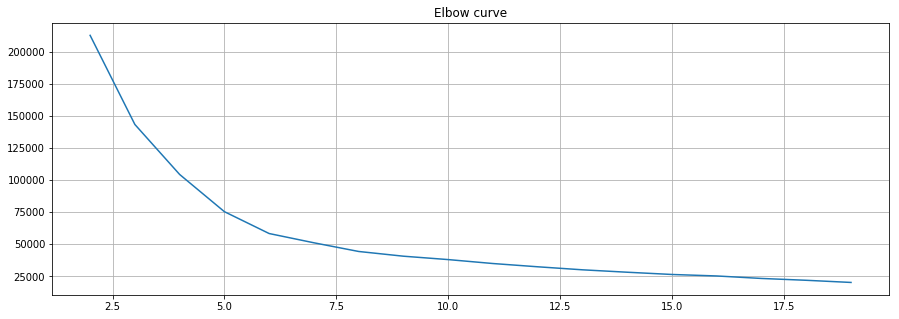

In [28]:
X = df
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # inertia = Sum of squared distances of samples to their closest cluster center.
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

-> 6개 정도로 잡는게 좋을 듯하다

### 3. DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3,min_samples=6)

predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# predict 한것 붙이기
df_with_predict = pd.concat([df,predict],axis=1)

df_with_predict.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,0,19,15,39,-1
1,0,21,15,81,-1
2,1,20,16,6,-1
3,1,23,16,77,-1
4,1,31,17,40,-1


In [58]:
predict[predict['predict']!=-1]

,predict


### -> eps값이 너무 작고 min_sample은 그에 비해 너무 커서 분류가 안된다. 조정해봐야 한다. k-dist 사용해보기

In [30]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
distance = euclidean_distances(df, df)
# distance = pairwise_distances(df,df)

#### 거리계산은 이렇게 하면 맞나요?? ㅜㅜ 수치가 조금 이상하게 나와서 ㅜㅜ

In [31]:
distance

array([[  0.        ,  42.04759208,  33.04542328, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01999733, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.04542328,  75.01999733,   0.        , ..., 129.8807145 ,
        122.18837915, 143.77412841],
       ...,
       [117.1110584 , 111.7631424 , 129.8807145 , ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18837915, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77412841, ...,  14.35270009,
         65.03076195,   0.        ]])

In [32]:
distance.shape

(200, 200)

In [33]:
# 각 점에서 뻗어가는 거리 나옴
distance[0]

array([  0.        ,  42.04759208,  33.04542328,  38.23610859,
        12.24744871,  37.18870796,  36.81032464,  55.23585792,
        57.76677246,  35.02855978,  54.2678542 ,  62.23343153,
        46.07602413,  38.66522986,  32.01562119,  40.42276586,
        17.57839583,  27.67670501,  35.39774004,  61.66036004,
        18.78829423,  35.67912555,  44.56455991,  37.41657387,
        44.94441011,  46.021734  ,  29.9165506 ,  30.14962686,
        26.4952826 ,  50.16971198,  55.95533933,  37.22902094,
        52.0096145 ,  55.98214001,  43.01162634,  45.74931693,
        37.08099244,  40.48456496,  30.70830507,  42.21374184,
        51.59457336,  57.99137867,  37.76241518,  34.71310992,
        39.97499218,  35.74912586,  42.93017587,  27.45906044,
        27.11088342,  27.91057147,  42.41462012,  36.95943723,
        33.9705755 ,  53.15072906,  42.21374184,  39.6484552 ,
        44.57577818,  58.22370651,  34.20526275,  46.54030511,
        62.05642594,  34.88552709,  59.14389233,  51.47

In [34]:
K=4

In [35]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
k_dist = []
for n in range(len(distance)):
    sort = distance[n].argsort()
    for i in range(len(sort)):
        if sort[i] == 4: # 4번째로 가까운 애면 list에 붙여라
            k_dist.append((i,distance[n][i])) 

In [36]:
k_dist

[(1, 42.04759208325728),
 (29, 15.394804318340652),
 (11, 94.24966843443005),
 (28, 50.73460357586329),
 (0, 12.24744871391589),
 (28, 49.92995093127971),
 (19, 92.13576938409967),
 (35, 19.949937343260004),
 (22, 19.1049731745428),
 (25, 13.527749258468683),
 (25, 78.41555968046137),
 (51, 45.332107826572546),
 (21, 66.85805860178712),
 (30, 82.0121942152507),
 (17, 55.66866263886712),
 (30, 84.66994744299774),
 (2, 33.03028912982749),
 (26, 42.790185790669334),
 (16, 18.16590212458495),
 (63, 49.57822102496216),
 (3, 44.41846462902562),
 (31, 7.280109889280518),
 (21, 71.18286310622803),
 (32, 72.86288492778748),
 (23, 63.40346993658943),
 (48, 41.773197148410844),
 (11, 68.33739825307956),
 (23, 13.0),
 (9, 43.37049688440288),
 (61, 36.46916505762094),
 (32, 7.615773105863909),
 (42, 46.69047011971501),
 (32, 0.0),
 (82, 73.77669008569035),
 (28, 19.6468827043885),
 (65, 26.814175355583846),
 (26, 16.431676725154983),
 (53, 33.04542328371661),
 (19, 73.35529974037323),
 (67, 56.1604

In [37]:
# sorting하기
sorted_dist = list(map(lambda x:x[1],sorted(k_dist,key=lambda x: x[1])))

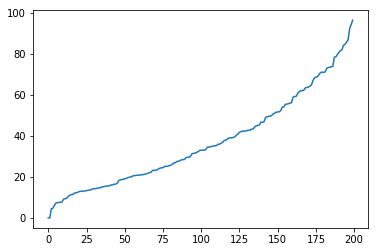

In [38]:
plt.plot(sorted_dist)

## Q.원래 이렇게 값 바뀌는 지점 없이 linear하게 증가하기도 하나요? 잘못 계산한걸까요?? ㅜㅜ

In [59]:
# 확 값이 바뀌는 지점이 없다 ㅜㅜ -> 일단 50정도의 길이 구해보기
sorted_dist[50]

19.1049731745428

### 해당하는 값 적당히 넣어보기

In [68]:
# 흐어어ㅜㅜ 다 결측치가 너무 많이 나오거나 모두 같은 cluster로 나온다
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=20,min_samples=3)

predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# predict 한것 붙이기
df_with_predict = pd.concat([df,predict],axis=1)

df_with_predict.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


In [69]:
predict['predict'].unique()

array([0])

In [79]:
# search 해보기
for eps in range(40):
    for s in range(3,31):
        model = DBSCAN(eps=eps*0.5+0.5,min_samples=s)

        predict = pd.DataFrame(model.fit_predict(df))
        predict.columns=['predict']

        # predict 한것 붙이기
        df_with_predict = pd.concat([df,predict],axis=1)
        
        if (predict['predict']==-1).sum()<20 and len(predict['predict'].unique())>2:
            print('예측거리=',eps*0.5+0.5, '예측min개수=',s, '결측치로 처리될 값=',(predict['predict']==-1).sum(),'unique한 class 개수 =', predict['predict'].unique())
            
        
        

예측거리= 12.0 예측min개수= 3 결측치로 처리될 값= 18 unique한 class 개수 = [-1  0  1  2  4  3  5]
예측거리= 12.5 예측min개수= 3 결측치로 처리될 값= 16 unique한 class 개수 = [ 0 -1  1  2]
예측거리= 12.5 예측min개수= 4 결측치로 처리될 값= 18 unique한 class 개수 = [ 0 -1  1  2  3  4]
예측거리= 13.0 예측min개수= 3 결측치로 처리될 값= 16 unique한 class 개수 = [ 0 -1  1  2]
예측거리= 13.0 예측min개수= 4 결측치로 처리될 값= 17 unique한 class 개수 = [ 0 -1  1  2  3]
예측거리= 13.5 예측min개수= 3 결측치로 처리될 값= 8 unique한 class 개수 = [ 0 -1  1  2]
예측거리= 13.5 예측min개수= 4 결측치로 처리될 값= 11 unique한 class 개수 = [ 0 -1  1  2  3]
예측거리= 14.0 예측min개수= 3 결측치로 처리될 값= 8 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.0 예측min개수= 4 결측치로 처리될 값= 9 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.0 예측min개수= 5 결측치로 처리될 값= 14 unique한 class 개수 = [-1  0  1]
예측거리= 14.5 예측min개수= 3 결측치로 처리될 값= 5 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.5 예측min개수= 4 결측치로 처리될 값= 9 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.5 예측min개수= 5 결측치로 처리될 값= 14 unique한 class 개수 = [-1  0  1]
예측거리= 14.5 예측min개수= 6 결측치로 처리될 값= 17 unique한 class 개수 = [-1  0  1  2  3]
예측거리= 15.0 예측min개수=

-> 예측거리= 13.5 예측min개수= 3 결측치로 처리될 값= 8 unique한 class 개수 = [ 0 -1  1  2] 
13.5, 3 정도가 괜찮을 듯

In [80]:
# 흐어어ㅜㅜ 다 결측치가 너무 많이 나오거나 모두 같은 cluster로 나온다
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=13.5,min_samples=3)

predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# predict 한것 붙이기
df_with_predict = pd.concat([df,predict],axis=1)

df_with_predict.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,-1
3,1,23,16,77,0
4,1,31,17,40,0


#### -> 앗! class가 많아도 0 class가 대부분을 먹어버린다.
### and (predict['predict']==0).sum()<60 조건 붙이면 아무것도 안나온다

In [83]:
# search 해보기
for eps in range(40):
    for s in range(3,31):
        model = DBSCAN(eps=eps*0.5+0.5,min_samples=s)

        predict = pd.DataFrame(model.fit_predict(df))
        predict.columns=['predict']

        # predict 한것 붙이기
        df_with_predict = pd.concat([df,predict],axis=1)
        # 0개수가 60개 이하인것 찾기
        if (predict['predict']==-1).sum()<20 and len(predict['predict'].unique())>2 and (predict['predict']==0).sum()<100:
            print('예측거리=',eps*0.5+0.5, '예측min개수=',s, '결측치로 처리될 값=',(predict['predict']==-1).sum(),'unique한 class 개수 =', predict['predict'].unique())
            
        
        

### 거리 자체가 scaling을 해야 작게 잡을 수 있을 듯 하다. 

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


scaler = StandardScaler()
model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler,model)
predict = pd.DataFrame(pipeline.fit_predict(df))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df,predict],axis=1)

# ct = pd.crosstab(data['labels'],r['predict'])
# print (ct)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [87]:
r

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,0,19,15,39,-1
1,0,21,15,81,-1
2,1,20,16,6,-1
3,1,23,16,77,-1
4,1,31,17,40,-1
5,1,22,17,76,-1
6,1,35,18,6,-1
7,1,23,18,94,-1
8,0,64,19,3,-1
9,1,30,19,72,-1


### -> 이것도 이상하게 나온다 ㅜㅜ 흙흙흙